In [1]:
from GC.from_cdf import GcCdfReader

In [2]:
file = r"\\hlabstorage.dmz.marum.de\scratch\Yannick\gc-fid\fileformatsapolarfractions\1807rka.cdf"

(0.0, 100.0)

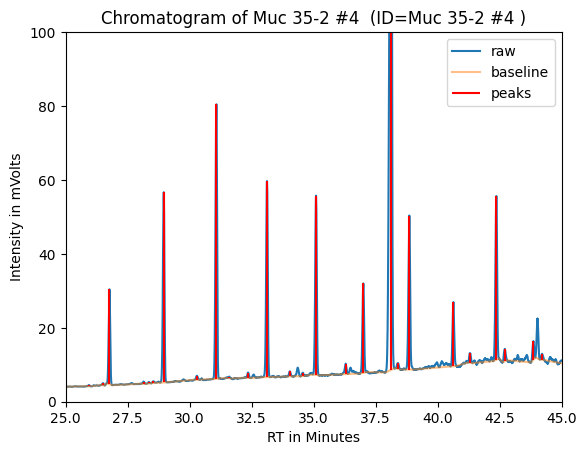

In [3]:
rdr = GcCdfReader(file)

ax = rdr.plot_xy()
ax.set_xlim([25, 45])
ax.set_ylim([0, 100])

C:\Users\Yannick Zander\Nextcloud2\Promotion\GC\GC\from_cdf.py:111: PeakPropertyWarning: some peaks have a prominence of 0
  properties = peak_widths(self.intensities, peaks=peak_idcs, rel_height=.5)
C:\Users\Yannick Zander\Nextcloud2\Promotion\GC\GC\from_cdf.py:111: PeakPropertyWarning: some peaks have a width of 0
  properties = peak_widths(self.intensities, peaks=peak_idcs, rel_height=.5)


<Axes: >

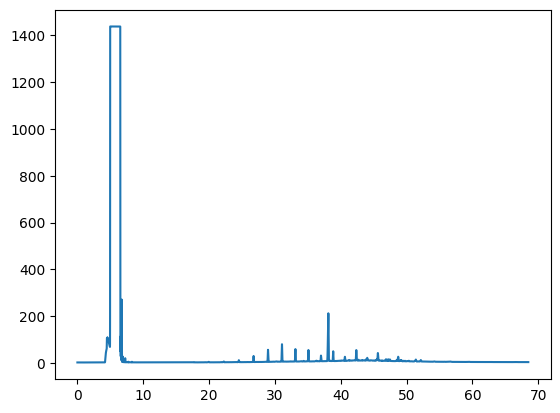

In [4]:
spec = rdr.get_spectrum()
spec.plot()

<Axes: >

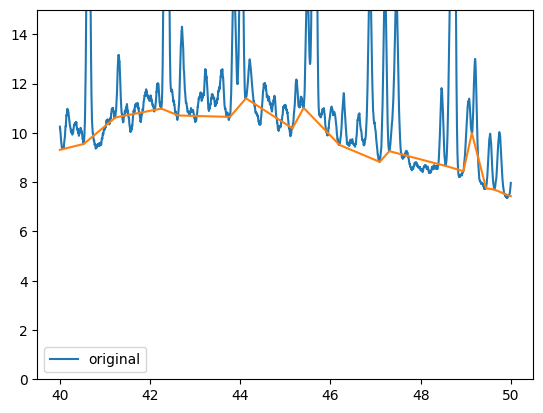

In [5]:
spec.baseline.plot(x=spec.x, y=spec.y, y_lim=[0, 15], x_lim=[40, 50])

<Axes: >

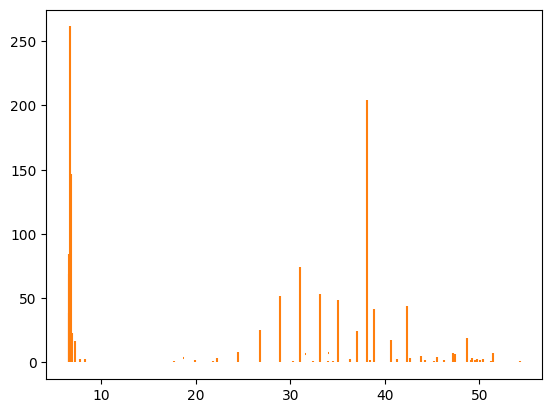

In [6]:
spec.plot_peaks()

# saved analysis not trustworthy, do it again

<Axes: >

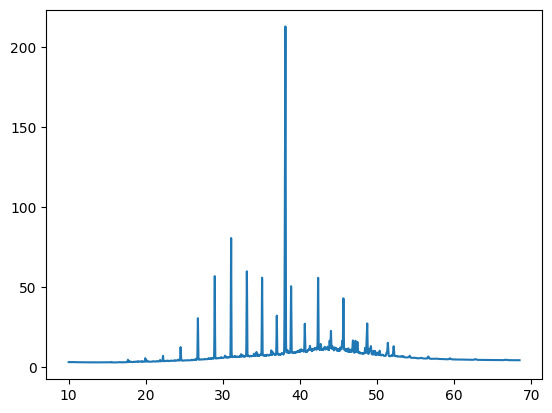

In [7]:
spec_re = rdr.get_spectrum(use_available_peaks=False, use_available_baseline=False)
spec_re.set_window([10, 80])
spec_re.plot()

Spectrum is not resampled. It is recommended to ensure even sampling before finding the baseline


<Axes: >

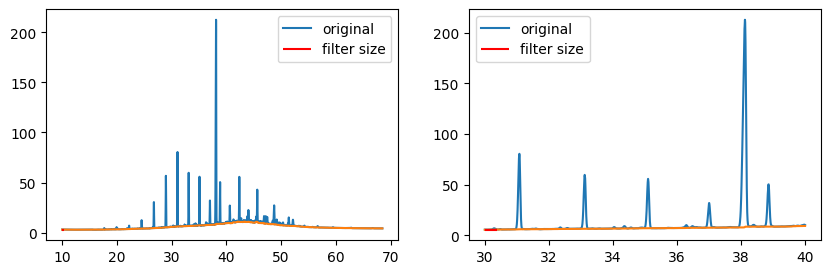

In [13]:
from matplotlib import pyplot as plt

spec_re.find_baseline()
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
spec_re.baseline.plot(x=spec_re.x, y=spec_re.y, ax=axs[0])
spec_re.baseline.plot(x=spec_re.x, y=spec_re.y, ax=axs[1], x_lim=[30, 40])

Baseline subtraction has been called before


(0.0, 100.0)

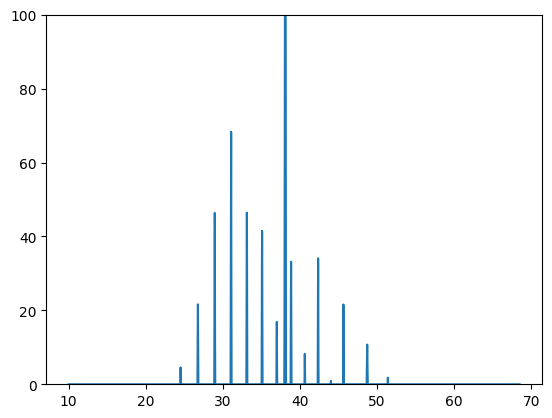

In [15]:
spec_re.subtract_baseline()
ax = spec_re.plot()
ax.set_ylim([0, 100])

(30.0, 40.0)

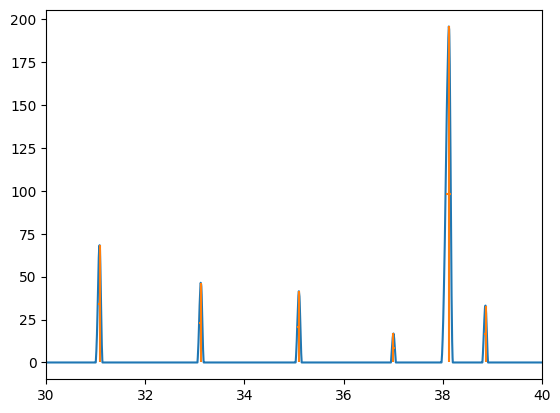

In [17]:
spec_re.find_peak_positions(rel_to='max', rel_prominence=.03)
ax = spec_re.peak_finder.plot()
ax.set_xlim([30, 40])

In [18]:
spec_re.find_peak_parameters(peak_shape='bigaussian')

(37.9, 38.4)

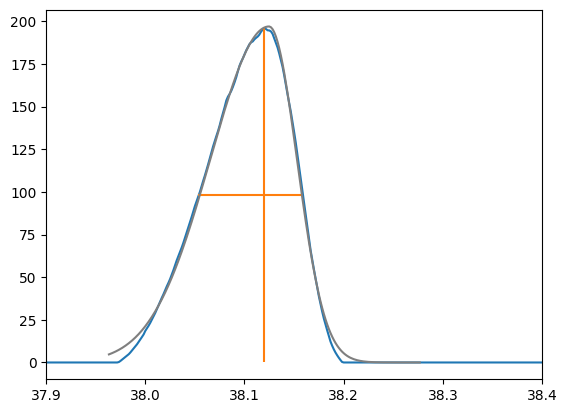

In [22]:
ax = spec_re.plot()
spec_re.plot_peaks(ax=ax)
ax.set_xlim([37.9, 38.4])

In [24]:
spec_re.set_peak_abundances(use_fitted=False, integrate=True, max_standard_deviations=2)

(0.0, 75.0)

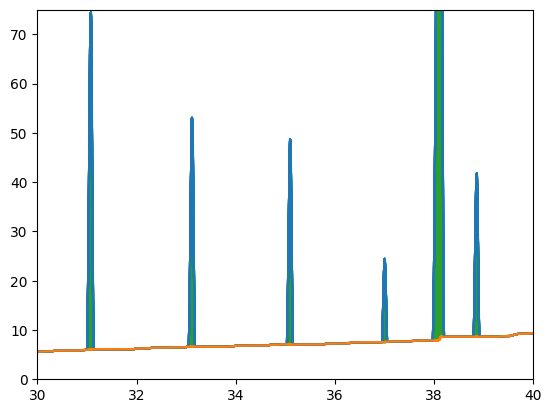

In [28]:
ax = spec_re.plot_integrated_peak(x_lim=[-float('inf'), float('inf')])
ax.set_xlim([30, 40])
ax.set_ylim([0, 75])